In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

cancer_data = pd.read_csv('cancer_data.csv')
cancer_data = cancer_data.drop(columns = ['Unnamed: 0'])
cancer_data = cancer_data.iloc[:, :12]
cancer_data.head()



,diagnosis,children,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,Yes,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,No,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,Yes,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,No,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,Yes,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


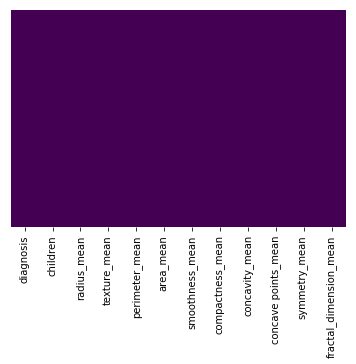

In [3]:
#Check if is there any null data
sns.heatmap(cancer_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis') # Check the NA

In [4]:
children = pd.get_dummies(cancer_data['children'], drop_first = True)
cancer_data = pd.concat([cancer_data, children], axis = 1)
cancer_data = cancer_data.iloc[:,[0,2,3,6,7,8,9,10,11,12]]
cancer_data.head()

#Normalization the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(cancer_data.drop(['diagnosis'], axis = 1))
scaled_features = scaler.transform(cancer_data.drop(['diagnosis'], axis = 1))
scaled_features

array([[ 1.09706398e+00, -2.07333501e+00,  1.56846633e+00, ...,
         2.21751501e+00,  2.25574689e+00,  1.05605002e+00],
       [ 1.82982061e+00, -3.53632408e-01, -8.26962447e-01, ...,
         1.39236330e-03, -8.68652457e-01, -9.46924847e-01],
       [ 1.57988811e+00,  4.56186952e-01,  9.42210440e-01, ...,
         9.39684817e-01, -3.98007910e-01,  1.05605002e+00],
       ...,
       [ 7.02284249e-01,  2.04557380e+00, -8.40483881e-01, ...,
        -8.09117071e-01, -8.95586935e-01,  1.05605002e+00],
       [ 1.83834103e+00,  2.33645719e+00,  1.52576706e+00, ...,
         2.13719425e+00,  1.04369542e+00,  1.05605002e+00],
       [-1.80840125e+00,  1.22179204e+00, -3.11208479e+00, ...,
        -8.20069901e-01, -5.61032377e-01, -9.46924847e-01]])

In [5]:
cancer_feat = pd.DataFrame(scaled_features, columns = cancer_data.columns[1:] )
cancer_feat.head()


,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,Yes
0,1.097064,-2.073335,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,1.056050
1,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,-0.946925
2,1.579888,0.456187,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.056050
3,-0.768909,0.253732,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,-0.946925
4,1.750297,-1.151816,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.056050


In [6]:
#Split into training, testing set
from sklearn.model_selection import train_test_split
X = cancer_feat
y = cancer_data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
print("Training size: %d" %len(y_train))
print("Test size    : %d" %len(y_test))

Training size: 426
Test size    : 143


In [9]:
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

start = time.time()
classifier = GaussianNB()
classifier.fit(X_train, y_train)

#Prediciting the test set results
y_pred = classifier.predict(X_test)
scores = cross_val_score(classifier, X, y)

end = time.time()

In [13]:
accuracy_all = accuracy_score(y_test, y_pred)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

print("Naive Bayes Accuracy: {0:.2%}".format(accuracy_all))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


[[86  2]
 [ 5 50]]


             precision    recall  f1-score   support

          B       0.95      0.98      0.96        88
          M       0.96      0.91      0.93        55

avg / total       0.95      0.95      0.95       143

Naive Bayes Accuracy: 95.10%
Cross validation score: 91.92% (+/- 0.48%)
Execution time: 0.013 seconds 

